In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='mikeriano', api_key='gxerO2sZWw926lsHB5k6')

In [3]:
pitch_df = pd.read_csv("pitches.csv")

In [4]:
data = pitch_df[['ab_id','b_count','b_score','end_speed','nasty','on_1b','on_2b','on_3b','outs','pitch_num','pitch_type']]

In [5]:
data = data.rename(index=str, columns={"ab_id": "at_bat_id", "b_count": "ball_count", 'b_score':'batter_team_score',\
                               "end_speed":"pitch_speed_at_home_plate",'nasty':'pitch_speed'})
data.head()

,at_bat_id,ball_count,batter_team_score,pitch_speed_at_home_plate,pitch_speed,on_1b,on_2b,on_3b,outs,pitch_num,pitch_type
0,2.015000e+09,0,0,84.1,55.0,False,False,False,0,1,FF
1,2.015000e+09,0,0,84.1,31.0,False,False,False,0,2,FF
2,2.015000e+09,0,0,85.2,49.0,False,False,False,0,3,FF
3,2.015000e+09,0,0,84.0,41.0,False,False,False,0,4,FF
4,2.015000e+09,1,0,69.6,18.0,False,False,False,0,5,CU


In [6]:
pitch_type = data.groupby("pitch_type")["pitch_speed_at_home_plate"].mean()

In [7]:
pitch_type.head()

pitch_type
AB    70.711111
CH    77.339375
CU    72.005719
EP    61.752270
FA    81.988889
Name: pitch_speed_at_home_plate, dtype: float64

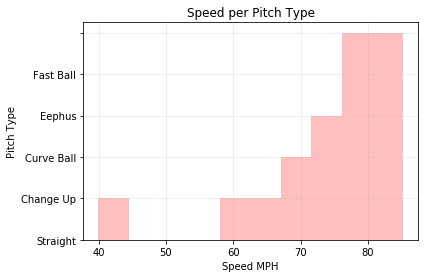

In [8]:
plt.ylabel("Pitch Type")
plt.yticks(np.arange(len(pitch_type)), ["Straight","Change Up","Curve Ball","Eephus","Fast Ball"])
plt.xlabel("Speed MPH")
plt.title("Speed per Pitch Type")
plt.grid(alpha=.25)
pitch_type.hist(color="r",alpha=.25)

#It could be noted that Off types of pitches can be signficantlly slower i.e(Eephus / Curve) and are meant to create 
#a movement diversion as the pitch reaches homeplate.  This data corroborates this assumption. 

In [9]:
avg_pitcher_speed = data.groupby("at_bat_id")["pitch_speed_at_home_plate"].mean()

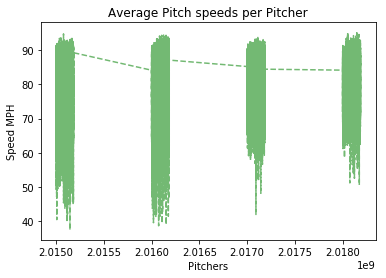

In [10]:
plt.title("Average Pitch speeds per Pitcher")
plt.xlabel("Pitchers")
plt.ylabel("Speed MPH")
plt.plot(avg_pitcher_speed,color='g',linestyle="--",alpha=.55)
#The Data does not present what the pitchers names are, and are organized by number. 

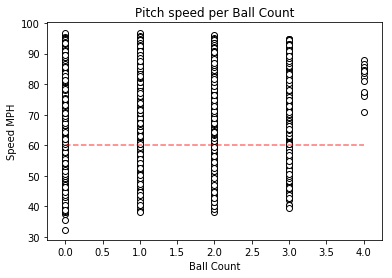

In [11]:
plt.xlabel("Ball Count")
plt.ylabel("Speed MPH")
plt.title("Pitch speed per Ball Count")
plt.hlines(60,0,4,linestyle="--", color="r", alpha=.55)
plt.scatter(data["ball_count"],data["pitch_speed_at_home_plate"], color="white", edgecolor='black')
#It appears the closer a batter is to walk does not impact pitch speeds and remains relativel constant.

In [ ]:
plt.xlabel("Outs")
plt.ylabel("Speed MPH")
plt.title("Pitch speed per out Count")
plt.hlines(60,0,2,linestyle="--", color="b", alpha=.55)
plt.scatter(data["outs"],data["pitch_speed_at_home_plate"], color="white", edgecolor='red')
plt.savefig("speedpercount.png")
#It apperas the out count does not affect pitch speed either.  I made a wrong assumption
#that as out's increased, it may increase edginess and cause anxiety / higher pitches.

In [ ]:
plt.xlabel("pitch count")
plt.ylabel("Speed MPH")
plt.title("Pitch speed per Pitch Count")
plt.hlines(60,0,20,linestyle="--", color="y", alpha=.55)
plt.scatter(data["pitch_num"],data["pitch_speed_at_home_plate"], color="white", edgecolor='red')
#As  pitcher warms up, it appears the pitcher is more consistent in throowing higher speeds. 

In [ ]:
x1 = ["Straight","Change Up","Curve Ball","Eephus","Fast Ball"]
y1 = [81.96666666666667, 83.85, 83.8, 79.3, 84.22]

# (2) Make dictionary linking x and y coordinate lists to 'x' and 'y' keys
trace1 = dict(x=x1, y=y1)

# (3) Make list of 1 trace, to be sent to Plotly
data = [trace1]

In [ ]:
py.iplot(data, filename='Project 2 Plot')
#a duplicate plot of Average Speed per Pitch Type
#a seaborn plot is located on my page @ plotly https://plot.ly/~mikeriano